# HIV Model

Richard Gao

In [26]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [27]:
# Set initial state
init = State(R = 1000,
             L = 0,
             E = 0,
             V = 1)

,values
R,1000
L,0
E,0
V,1


In [28]:
# Define System
system = System(R_birthrate = 1.36,                # Gamma
                R_activation_rate = 0.2,           # tao
                R_death_rate = 0.00136,            # mu
                R_infection_rate = 0.00027,        # Beta
                L_activation_rate = 0.036,         # alpha
                latent_infec_rate = 0.1,           # rho
                E_death_rate = 0.33,               # delta
                V_birth_rate = 100,                # pi
                V_death_rate = 2,                  # sigma
                init=init,
                t0=0,
                t_end=100,
                dt=.1)                  

,values
R_birthrate,1.36
R_activation_rate,0.2
R_death_rate,0.00136
R_infection_rate,0.00027
L_activation_rate,0.036
latent_infec_rate,0.1
E_death_rate,0.33
V_birth_rate,100
V_death_rate,2
init,R 1000 L 0 E 0 V 1 dtype:...


In [29]:
def plot_results(R, L, E, V):
    plot(R, '-r', label='Uninfected lymphocytes')
    plot(L, '-g', label='Latently infected cells')
    plot(E, '-b', label='Actively infected cells')
    plot(V, '-y', label='Free virions')
    decorate(xlabel='Time (days)',
             ylabel='Population')

In [30]:
def update_func(state, dt, system):
    unpack(system)
    r, l, e, v = state
    
    delta_R = (R_birthrate * R_activation_rate) - (R_death_rate * r) - (R_infection_rate * r * v)
    delta_L = (latent_infec_rate * R_infection_rate * r * v) - (R_death_rate * l) - (L_activation_rate * l)
    delta_E = ((1-latent_infec_rate) * R_infection_rate * v * r) + (L_activation_rate * l) - (E_death_rate * e)
    delta_V = (V_birth_rate * e) - (V_death_rate * v)
    
    r += delta_R * dt
    l += delta_L * dt
    e += delta_E * dt
    v += delta_V * dt
    
    return State(R=r, L=l, E=e, V=v)

run_simulation creates a TimeFrame to store the Timeseries that are defined in individual timesteps. The timesteps is necessary to explicity state because the dt is a non-integer value. Perfoming computations using small non-integer values often results in rounding issues. By creating a Series (timesteps) that hold the value of t in each index (specified by linspace), the values of t will not be inaccurate.

In [31]:
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    steps = linspace(t0, t_end, int(t_end / dt))
    timesteps = Series(steps)
    
    print(timesteps.index)
    
    for t in timesteps.index[:-1]:
        frame.row[timesteps[t+1]] = update_func(frame.row[timesteps[t]], dt, system)
        
    return frame

In [32]:
results = run_simulation(system, update_func)
# results.head()

RangeIndex(start=0, stop=1000, step=1)


,R,L,E,V
0.000000,1000,0,0,1
0.100100,999.864,0.0027,0.0243,0.8
0.200200,999.734,0.00484962,0.0429452,0.883
0.300300,999.601,0.00721497,0.0629966,1.13585
0.400400,999.462,0.0102536,0.0885339,1.53865
0.500501,999.312,0.0143674,0.123018,2.11626
0.600601,999.146,0.0200237,0.1704,2.92319
0.700701,998.958,0.0278347,0.235822,4.04255
0.800801,998.741,0.0386343,0.326271,5.59226
0.900901,998.481,0.05357,0.451364,7.73652


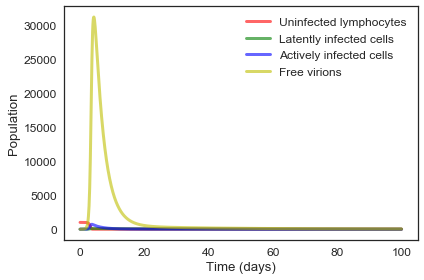

In [33]:
plot_results(results.R, results.L, results.E, results.V)

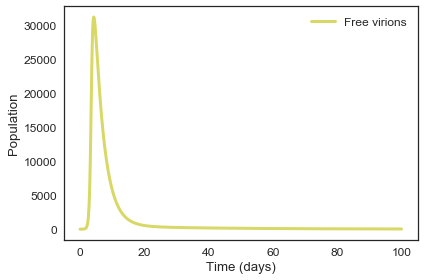

In [34]:
plot(results.V, '-y', label='Free virions')
decorate(xlabel='Time (days)',
         ylabel='Population')

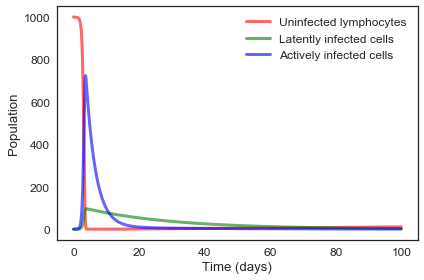

In [35]:
plot(results.R, '-r', label='Uninfected lymphocytes')
plot(results.L, '-g', label='Latently infected cells')
plot(results.E, '-b', label='Actively infected cells')
decorate(xlabel='Time (days)',
         ylabel='Population')